In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

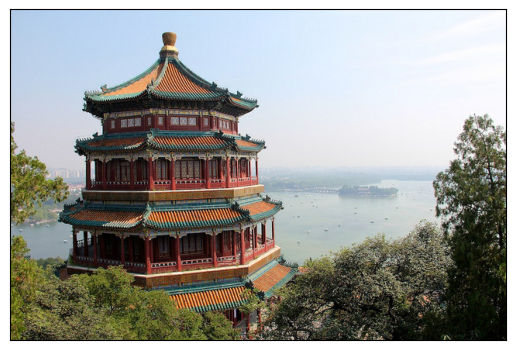

In [2]:
from matplotlib.pyplot import xticks


china=load_sample_image("china.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [3]:
china


array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [4]:
china.shape

(427, 640, 3)

In [7]:
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

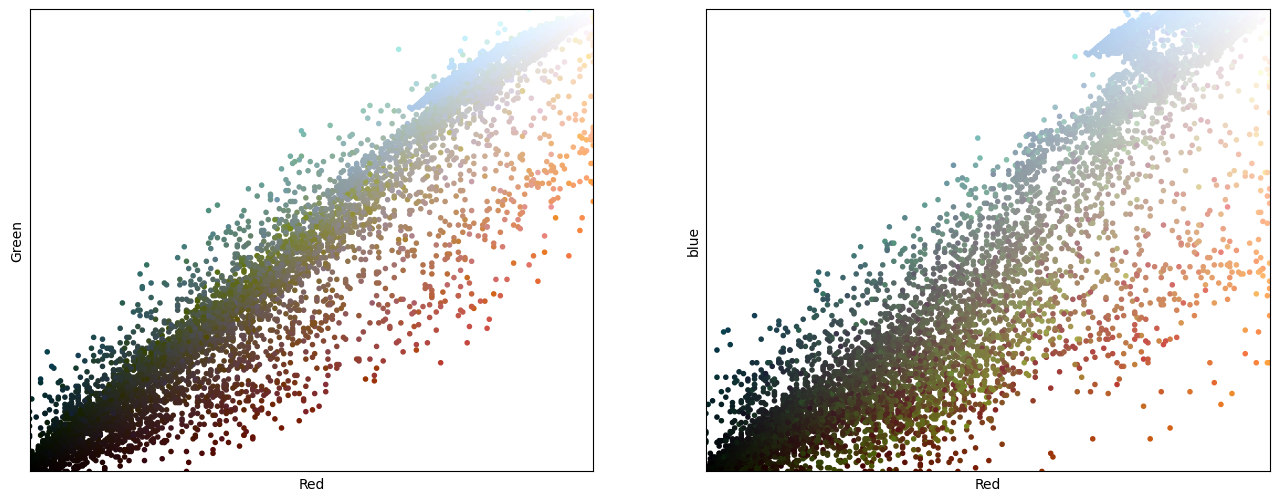

In [10]:

def plot_pixels(data,title,colors=None,N=10000):
    if colors==None:
        colors=data

    rng=np.random.RandomState(0) 
    i=rng.permutation(data.shape[0])[:N] 
    colors=colors[i]
    R,G,B= data[i].T 

    fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
    ax[0].scatter(R,G,color=colors,marker='.') 
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))

    ax[1].scatter(R,B,marker='.',color=colors)
    ax[1].set(xlabel='Red',ylabel='blue',xlim=(0,1),ylim=(0,1))
    plt.show()
plot_pixels(data,title="Input color space: 16 million possible colors")

In [11]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import MiniBatchKMeans

In [12]:
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
y_means=kmeans.predict(data)

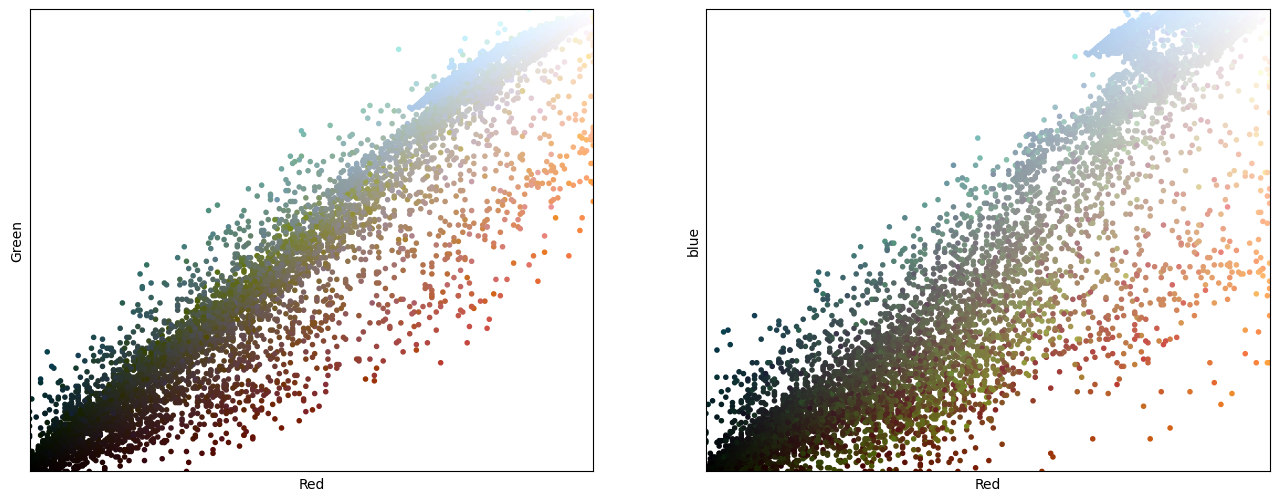

In [14]:
new_color=kmeans.cluster_centers_[y_means]
plot_pixels(data,title="Reduced color space : 16 colors")


Text(0.5, 1.0, 'rendered image')

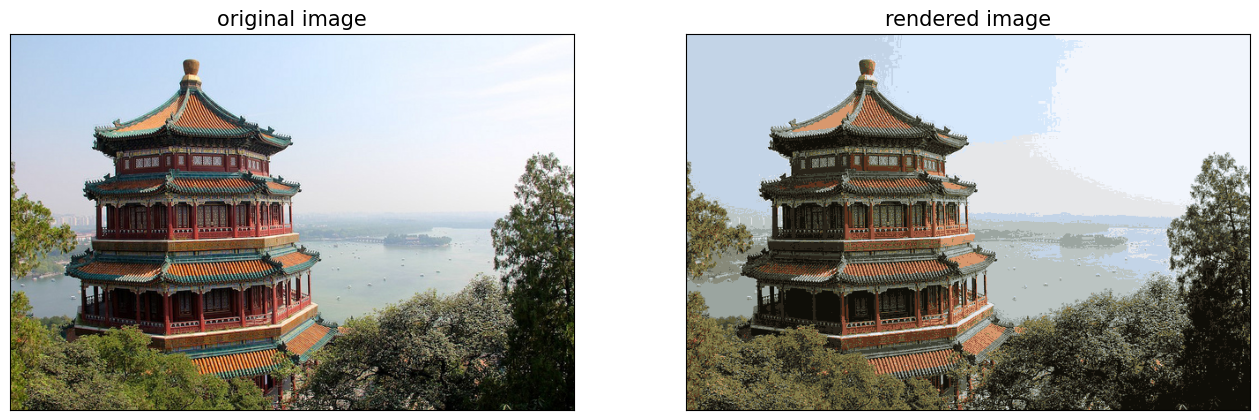

In [18]:

china_recolored=new_color.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(china)
ax[0].set_title("original image",size=15)

ax[1].imshow(china_recolored)
ax[1].set_title("rendered image",size=15)
